In [ ]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_hist = tesla.history(period="1y") 

tesla_hist.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-18 00:00:00-04:00,151.250000,152.199997,148.699997,149.929993,96098800,0.0,0.0
2024-04-19 00:00:00-04:00,148.970001,150.940002,146.220001,147.050003,86005100,0.0,0.0
2024-04-22 00:00:00-04:00,140.559998,144.440002,138.800003,142.050003,107097600,0.0,0.0
2024-04-23 00:00:00-04:00,143.330002,147.259995,141.110001,144.679993,124545100,0.0,0.0
2024-04-24 00:00:00-04:00,162.839996,167.970001,157.509995,162.130005,181178000,0.0,0.0


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        df_tesla_revenue = pd.read_html(str(table))[0]
        break

df_tesla_revenue.columns = ["Fecha", "Ingresos"]

df_tesla_revenue = df_tesla_revenue.dropna()
df_tesla_revenue = df_tesla_revenue[df_tesla_revenue["Ingresos"] != ""]

df_tesla_revenue.tail()

C:\Users\great\AppData\Local\Temp\ipykernel_2744\2213942268.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_tesla_revenue = pd.read_html(str(table))[0]


,Fecha,Ingresos
57,2010-09-30,$31
58,2010-06-30,$28
59,2010-03-31,$21
61,2009-09-30,$46
62,2009-06-30,$27


In [ ]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")

gme_data = gme_data.reset_index()

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-04-18 00:00:00-04:00,10.32,10.63,10.27,10.31,2175400,0.0,0.0
1,2024-04-19 00:00:00-04:00,10.20,10.50,10.20,10.42,2455100,0.0,0.0
2,2024-04-22 00:00:00-04:00,10.41,10.45,10.01,10.01,3261000,0.0,0.0
3,2024-04-23 00:00:00-04:00,10.05,10.28,10.01,10.16,2511800,0.0,0.0
4,2024-04-24 00:00:00-04:00,10.16,10.94,10.16,10.93,4829600,0.0,0.0


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        df_gme_revenue = pd.read_html(str(table))[0]
        break

df_gme_revenue.columns = ["Fecha", "Ingresos"]

df_gme_revenue = df_gme_revenue.dropna()
df_gme_revenue = df_gme_revenue[df_gme_revenue["Ingresos"] != ""]

df_gme_revenue.tail()


C:\Users\great\AppData\Local\Temp\ipykernel_2744\2897378399.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_gme_revenue = pd.read_html(str(table))[0]


,Fecha,Ingresos
60,2010-01-31,"$3,524"
61,2009-10-31,"$1,835"
62,2009-07-31,"$1,739"
63,2009-04-30,"$1,981"
64,2009-01-31,"$3,492"


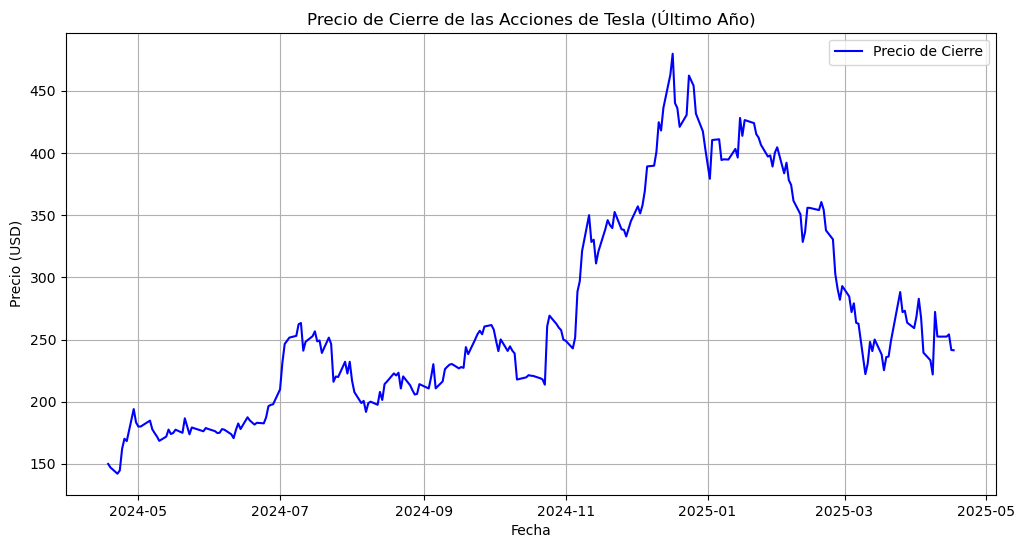

In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
tesla_data = tesla_data.reset_index()

def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data['Close'], label='Precio de Cierre', color='blue')
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.grid(True)
    plt.legend()
    plt.show()
tesla_data = tesla_data.reset_index()

make_graph(tesla_data, "Precio de Cierre de las Acciones de Tesla (Último Año)")


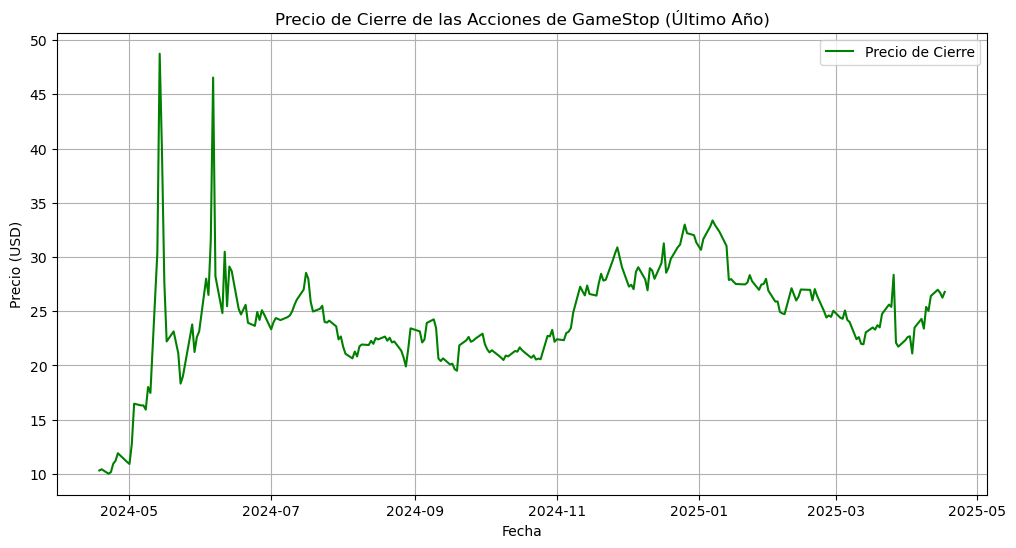

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")
gme_data = gme_data.reset_index()

def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data['Close'], label='Precio de Cierre', color='green')
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.grid(True)
    plt.legend()
    plt.show()
gme_data = gme_data.reset_index()

make_graph(gme_data, "Precio de Cierre de las Acciones de GameStop (Último Año)")

